In [185]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [186]:
import tensorflow as tf
from tensorflow import keras

In [187]:
train_dir = r'C:\Users\kolik\Blood_Cell_Detection\Dataset\train'
validation_dir = r'C:\Users\kolik\Blood_Cell_Detection\Dataset\valid'
test_dir =r'C:\Users\kolik\Blood_Cell_Detection\Dataset\test'

### Data Preprocessing

In [188]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [189]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 765 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


### Data Augmentation

In [190]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 765 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


## MODELS

### Model 1: Custom CNN Model

In [191]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [148]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [149]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 128)    

In [150]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [151]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(r"C:\Users\kolik\Blood_Cell_Detection\Model\Custom CNN Model\early_stop_model.h5", save_best_only=True)

In [153]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',
                   patience = 10,
                   restore_best_weights = True)

In [167]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      callbacks = [checkpoint_cb,early_stop_cb])

Epoch 1/100
23/23 [==============================] - 26s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/100
23/23 [==============================] - 26s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
23/23 [==============================] - 25s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/100
23/23 [==============================] - 24s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/100
23/23 [==============================] - 26s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/100
23/23 [==============================] - 25s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/100
23/23 [==============================] - 24s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/100
23/23 [==============================] - 25s 1s/step - loss: 0.6931 - a

In [169]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128,128),
        batch_size=2,
        class_mode='categorical')

Found 36 images belonging to 2 classes.


In [170]:
test_generator.batch_size

2

In [171]:
custom_evaluation = model.evaluate(test_generator, steps=(36/test_generator.batch_size))

18/18 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5000


In [174]:
print("Loss: ",custom_evaluation[0])
print("Accuracy: ",custom_evaluation[1])

Loss:  0.6931473612785339
Accuracy:  0.5


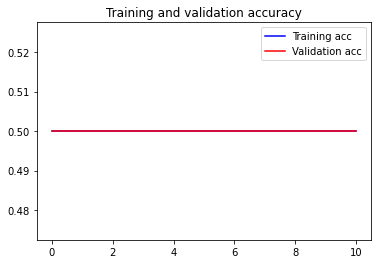

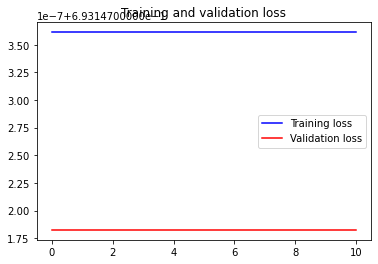

<Figure size 432x288 with 0 Axes>

In [255]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
plt.savefig(r'C:\Users\kolik\Blood_Cell_Detection\Images\customCNN_training.png')

### Model 2 - Pretrained Algorithm VGG16

In [192]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from keras.layers.core import Dense,Flatten,Dropout
from tensorflow.keras.layers import Dense, BatchNormalization

In [193]:
VGG_conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [194]:
VGG_conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [195]:
VGGmodel = models.Sequential()
VGGmodel.add(VGG_conv_base)
 
# Add new layers
VGGmodel.add(Flatten())
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(32, activation='relu' ))
VGGmodel.add(Dropout(0.2))
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(16, activation='relu' ))
VGGmodel.add(Dropout(0.2))
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(8, activation='relu' ))
VGGmodel.add(Dropout(0.2))
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(4, activation='relu' ))
VGGmodel.add(Dropout(0.2))
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(4, activation='relu' ))
VGGmodel.add(Dropout(0.2))
VGGmodel.add(BatchNormalization())
VGGmodel.add(Dense(1, activation='softmax'))
VGGmodel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                                 
 batch_normalization_13 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 32)                262176    
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_14 (Bat  (None, 32)               128       
 chNormalization)                                    

In [196]:
VGG_conv_base.trainable = False

In [197]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [198]:
VGGmodel.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

In [199]:
VGG16_checkpoint_cb = keras.callbacks.ModelCheckpoint(r"C:\Users\kolik\Blood_Cell_Detection\Model\VGG 16\VGG_model.h5", save_best_only=True)

In [200]:
VGG16_cb = tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',
                   patience = 50,
                   restore_best_weights = True)

In [207]:
historyVGG = VGGmodel.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/100
23/23 [==============================] - 48s 2s/step - loss: 0.8201 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/100
23/23 [==============================] - 52s 2s/step - loss: 0.8131 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/100
23/23 [==============================] - 69s 3s/step - loss: 0.8201 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 4/100
23/23 [==============================] - 60s 3s/step - loss: 0.8079 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 5/100
23/23 [==============================] - 65s 3s/step - loss: 0.8168 - acc: 0.5000 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 6/100
23/23 [==============================] - 56s 2s/step - loss: 0.8099 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 7/100
23/23 [==============================] - 73s 3s/step - loss: 0.8040 - acc: 0.5000 - val_loss: 0.6951 - val_acc: 0.5000
Epoch 8/100
23/23 [==============================] - 48s 2s/step - loss: 0.8006 - a

In [208]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128,128),
        batch_size=2,
        class_mode='categorical')

Found 36 images belonging to 2 classes.


In [209]:
VGG_custom_evaluation = VGGmodel.evaluate(test_generator, steps=(36/test_generator.batch_size))

18/18 [==============================] - 3s 141ms/step - loss: 0.6950 - acc: 0.5000


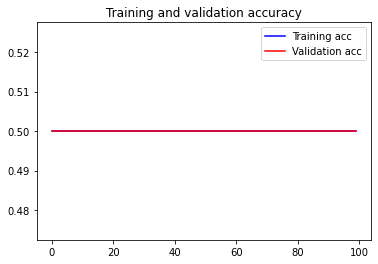

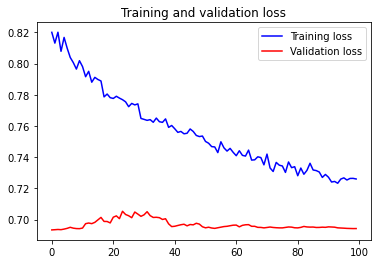

In [210]:
acc = historyVGG.history['acc']
val_acc = historyVGG.history['val_acc']
loss = historyVGG.history['loss']
val_loss = historyVGG.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [236]:
print("Loss: ",VGG_custom_evaluation[0])
print("Accuracy: ",VGG_custom_evaluation[1])

Loss:  0.6950476169586182
Accuracy:  0.5


In [229]:
model.save(r"C:\Users\kolik\Blood_Cell_Detection\Model\VGG 16\VGGmodel.h5")

### Model 3 - Pretrained Algorithm Xception

In [221]:
from tensorflow.keras.applications import Xception

In [222]:
X_conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [223]:
X_conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_8[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 16, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_26 (Conv2D)             (None, 8, 8, 728)    186368      ['add_13[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 8, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 8, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 8, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 8, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 8, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (Add)                   (None, 8, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_21[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_22[0][0]']                 
 on)      

In [224]:
Xmodel = models.Sequential()
Xmodel.add(VGG_conv_base)
 
# Add new layers
Xmodel.add(Flatten())
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(32, activation='relu' ))
Xmodel.add(Dropout(0.2))
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(16, activation='relu' ))
Xmodel.add(Dropout(0.2))
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(8, activation='relu' ))
Xmodel.add(Dropout(0.2))
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(4, activation='relu' ))
Xmodel.add(Dropout(0.2))
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(4, activation='relu' ))
Xmodel.add(Dropout(0.2))
Xmodel.add(BatchNormalization())
Xmodel.add(Dense(1, activation='softmax'))
Xmodel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 batch_normalization_33 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 32)                262176    
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_34 (Bat  (None, 32)               128       
 chNormalization)                                    

In [225]:
X_conv_base.trainable = False

In [226]:
Xmodel.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

In [227]:
X_checkpoint_cb = keras.callbacks.ModelCheckpoint(r"C:\Users\kolik\Blood_Cell_Detection\Model\Xception\X_model.h5", save_best_only=True)

In [230]:
X_cb = tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',
                   patience = 10,
                   restore_best_weights = True)

In [231]:
historyX = Xmodel.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      callbacks = [X_checkpoint_cb,X_cb])

Epoch 1/50
23/23 [==============================] - 48s 2s/step - loss: 0.7469 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
23/23 [==============================] - 46s 2s/step - loss: 0.7453 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/50
23/23 [==============================] - 46s 2s/step - loss: 0.7431 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 4/50
23/23 [==============================] - 47s 2s/step - loss: 0.7501 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 5/50
23/23 [==============================] - 47s 2s/step - loss: 0.7488 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 6/50
23/23 [==============================] - 46s 2s/step - loss: 0.7392 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 7/50
23/23 [==============================] - 46s 2s/step - loss: 0.7415 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 8/50
23/23 [==============================] - 46s 2s/step - loss: 0.7370 - acc: 0.50

In [232]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128,128),
        batch_size=2,
        class_mode='categorical')

Found 36 images belonging to 2 classes.


In [233]:
X_custom_evaluation = Xmodel.evaluate(test_generator, steps=(36/test_generator.batch_size))

18/18 [==============================] - 3s 145ms/step - loss: 0.6932 - acc: 0.5000


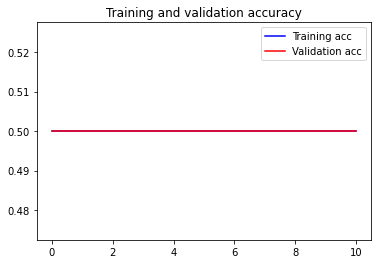

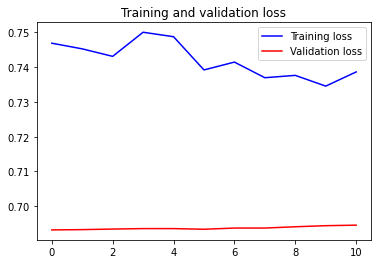

In [234]:
acc = historyX.history['acc']
val_acc = historyX.history['val_acc']
loss = historyX.history['loss']
val_loss = historyX.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [235]:
print("Loss: ",X_custom_evaluation[0])
print("Accuracy: ",X_custom_evaluation[1])

Loss:  0.6931660771369934
Accuracy:  0.5


In [237]:
model.save(r"C:\Users\kolik\Blood_Cell_Detection\Model\Xception\Xmodel.h5")

### Prediction of Class (0,1)

In [238]:
from keras.preprocessing import image

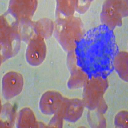

In [243]:
img=image.load_img(r'C:\Users\kolik\Blood_Cell_Detection\Dataset\test_image.jpg',target_size=(128,128))
img

In [253]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
classes=model.predict(x)
VGGclasses=VGGmodel.predict(x)
Xclasses=Xmodel.predict(x)
print("VGG Model Class Prediction: ",VGGclasses[0][0])
print("Xception Model Class Prediction: ",Xclasses[0][0])

VGG Model Class Prediction:  1.0
Xception Model Class Prediction:  1.0
